Define some useful functions

In [21]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%config InlineBackend.figure_format = 'retina'

In [3]:
def plot_one_image(path):
    plt.figure(figsize=(6, 6))
    image = mpimg.imread(path)
    plt.axis("off")
    plt.imshow(image)

I will use as example some images of books. There is first image of book which I take from online bookstore.

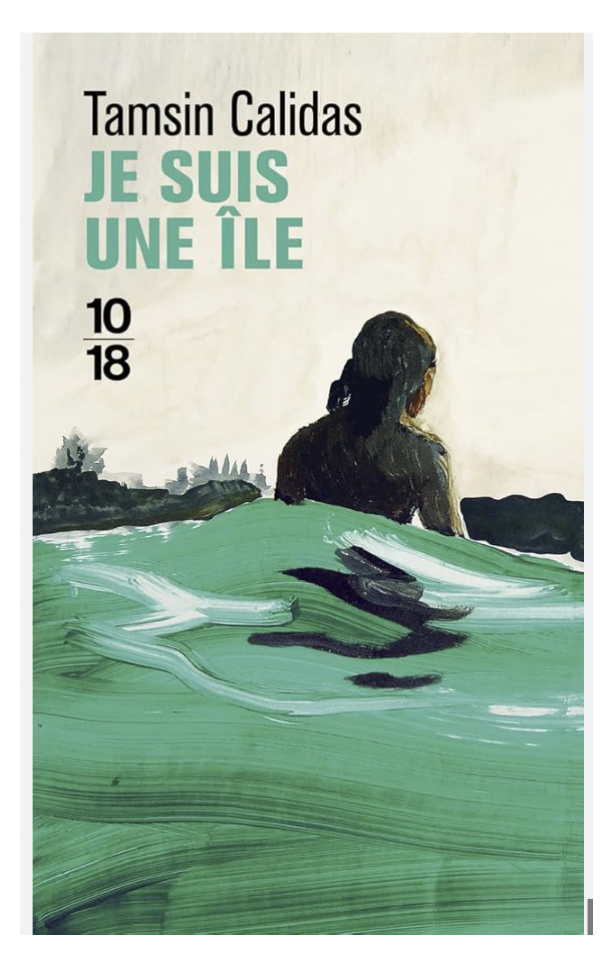

In [4]:
plot_one_image("images/book_1_orig.png")

And now image for this book from review blog post 

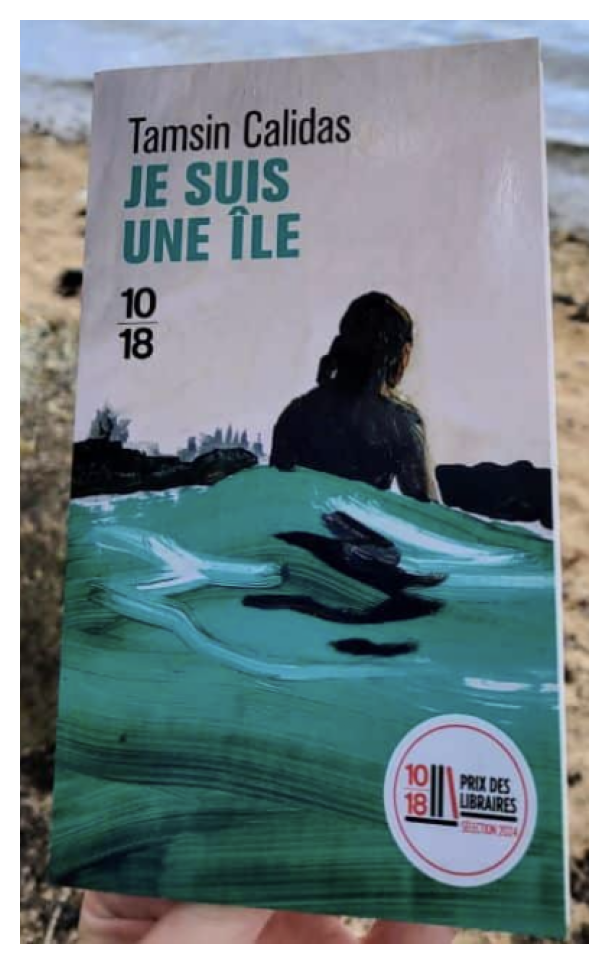

In [5]:
plot_one_image("images/book_1_photo_1.png")

Let's calculate the similarity score

In [6]:
from utils import *

In [7]:
import cv2

As for extracting features we will use cv2 (opencv), so I read images by cv2 in gray scale mode. For better matching, image shapes should be in a same scale. So I use function for resizing images to have maximum dimension as 256 pixels. I choose this number because in some my experiments it was optimum between accuracy and time of mathing. Using bigger images can lead to higher accuracy but will require more time to match

In [8]:
book_image_1 = image_resize(cv2.imread("images/book_1_orig.png", 0))
book_image_2 = image_resize(cv2.imread("images/book_1_photo_1.png", 0))

In [9]:
book_image_1.shape, book_image_2.shape

((256, 158), (256, 157))

Then we need to extract keypoints from both images

In [10]:
book_image_1_points, book_image_1_desc = compute_orb(book_image_1)
book_image_2_points, book_image_2_desc = compute_orb(book_image_2)

Function `calculate_matches` from `utils.py` uses knnMatch

In [11]:
good_matches = calculate_matches(book_image_1_desc, book_image_2_desc)
print("Number of matched keypoint pairs:", len(good_matches))

Number of matched keypoint pairs: 35


Now we can calculate similarity score

In [12]:
score = 100 * (len(good_matches) / max(len(book_image_1_points), len(book_image_2_points)))
score

29.411764705882355

Also with cv2 we can plot matched keypoint pairs on images

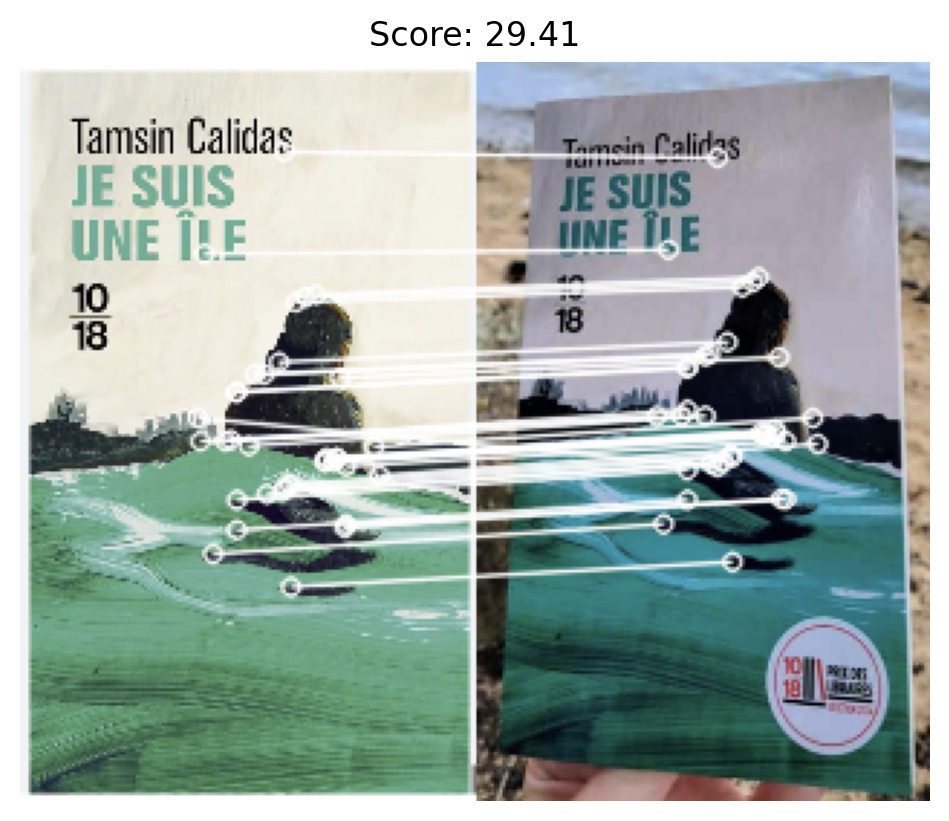

In [15]:
first_image = cv2.cvtColor(image_resize(cv2.imread("images/book_1_orig.png")), cv2.COLOR_BGR2RGB)
second_image = cv2.cvtColor(image_resize(cv2.imread("images/book_1_photo_1.png")), cv2.COLOR_BGR2RGB)

match_plot = cv2.drawMatchesKnn(
    first_image,
    book_image_1_points,
    second_image,
    book_image_2_points,
    good_matches,
    None,
    [255, 255, 255],
    flags=2,
)

plt.imshow(match_plot)
plt.title(f"Score: {round(score, 2)}")
plt.axis("off")
plt.show()

Now I will introduce function that calculate score, plot images and matched pairs by paths to images

In [16]:
def calculate_similarity(path_1, path_2, show_plot=False):
    image_1 = image_resize(cv2.imread(path_1))
    image_2 = image_resize(cv2.imread(path_2))
    gray_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    gray_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

    keypoints_1, descriptor_1 = compute_orb(gray_image_1)
    keypoints_2, descriptor_2 = compute_orb(gray_image_2)
    good_matches = calculate_matches(descriptor_1, descriptor_2)
    score = 100 * (len(good_matches) / max(len(keypoints_1), len(keypoints_2)))

    if show_plot:
        rgb_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
        rgb_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

        match_plot = cv2.drawMatchesKnn(
            rgb_image_1,
            keypoints_1,
            rgb_image_2,
            keypoints_2,
            good_matches,
            None,
            [255, 255, 255],
            flags=2,
        )

        plt.imshow(match_plot)
        plt.title(f"Score: {round(score, 2)}")
        plt.axis("off")
    return score

Let's see similarity between images with different books

2.8169014084507045

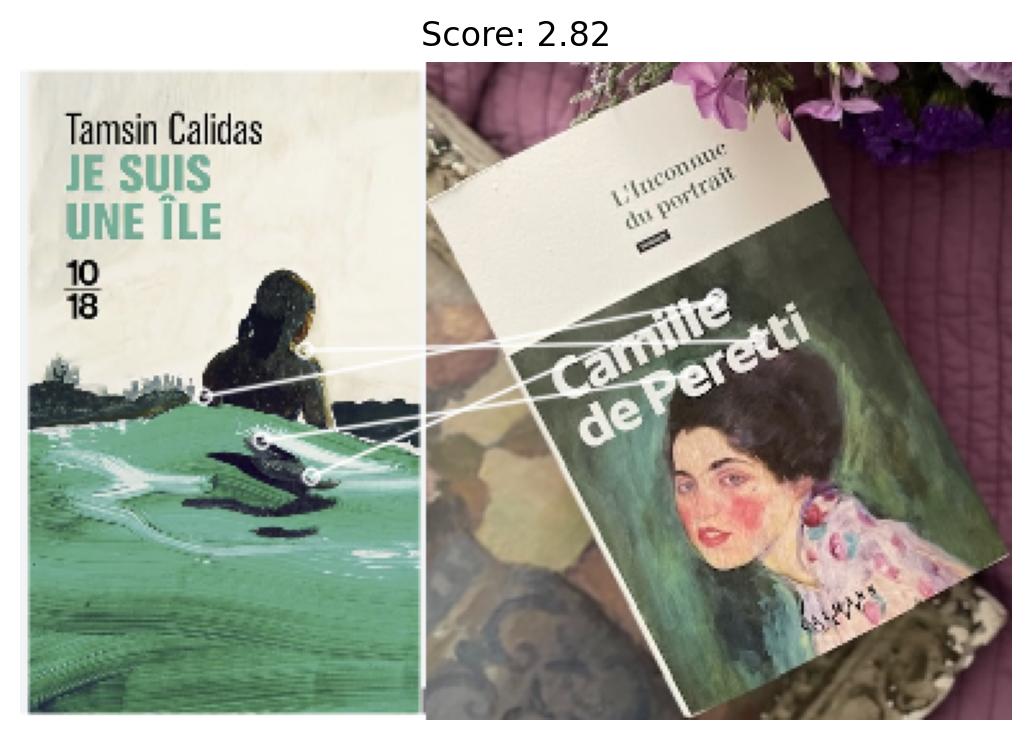

In [17]:
path_1 = "images/book_1_orig.png"
path_2 = "images/book_2_photo_1.jpeg"
calculate_similarity(path_1, path_2, show_plot=True)

As you can see current score is 2.82 while similar books have 29.41 score

Below there will be other examples

32.800000000000004

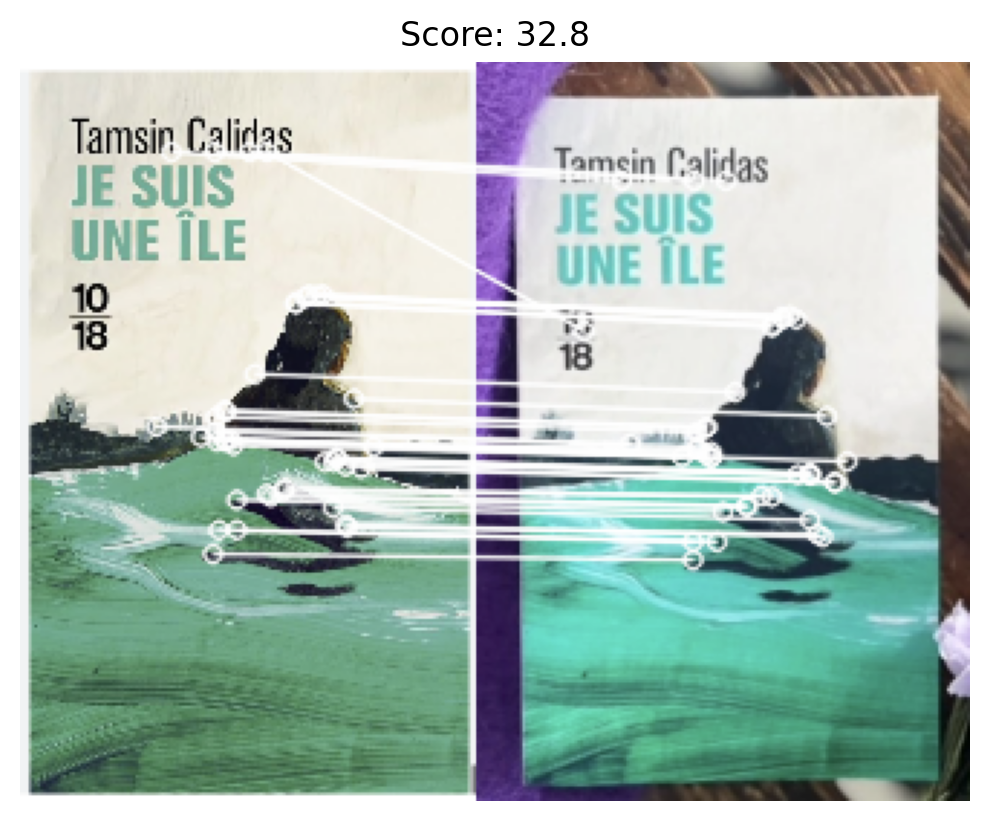

In [18]:
path_1 = "images/book_1_orig.png"
path_2 = "images/book_1_photo_2.png"
calculate_similarity(path_1, path_2, show_plot=True)

4.032258064516129

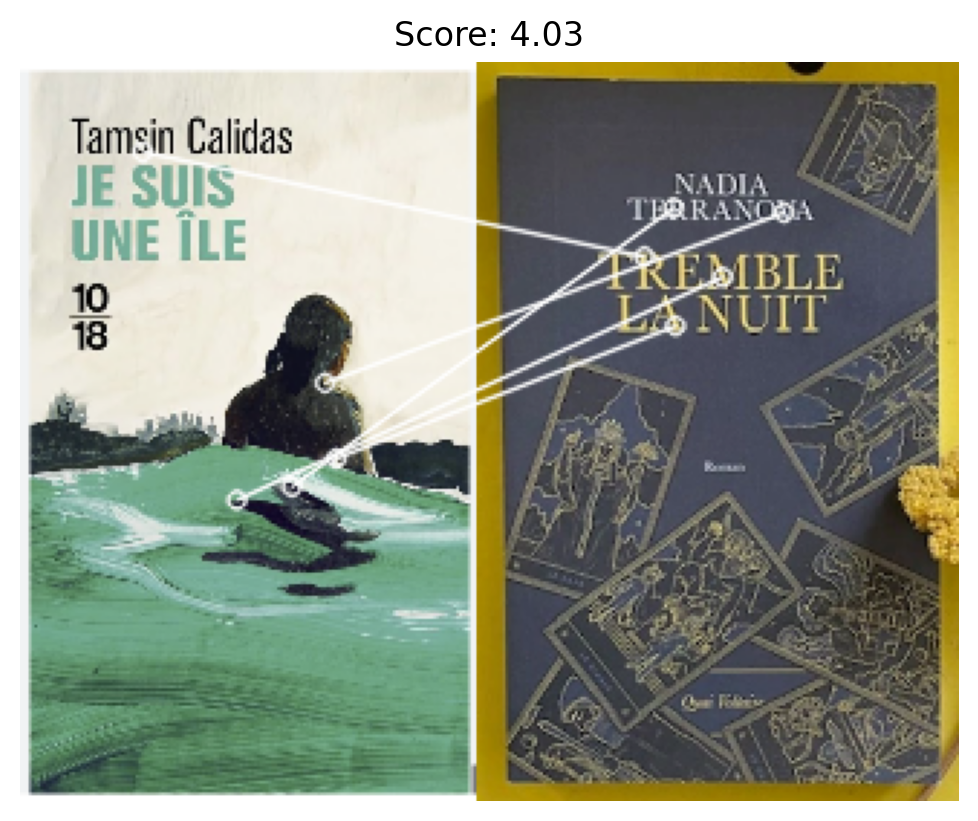

In [19]:
path_1 = "images/book_1_orig.png"
path_2 = "images/book_4_photo.png"
calculate_similarity(path_1, path_2, show_plot=True)

20.161290322580644

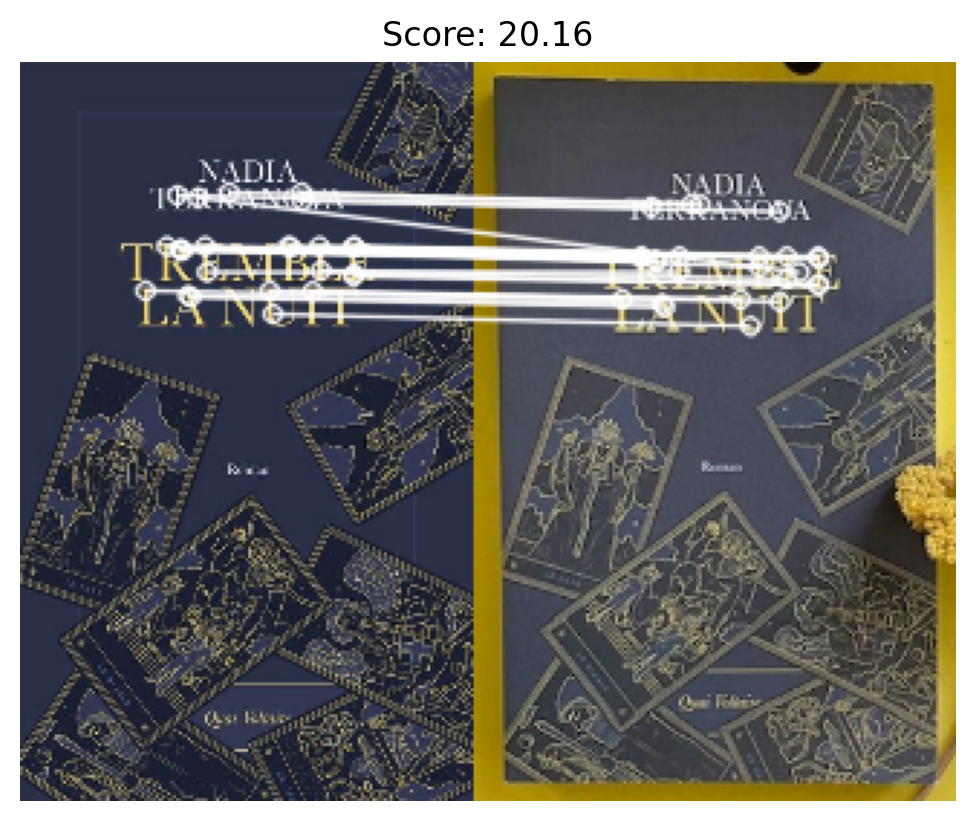

In [20]:
path_1 = "images/book_4_orig.jpg"
path_2 = "images/book_4_photo.png"
calculate_similarity(path_1, path_2, show_plot=True)